<a href="https://colab.research.google.com/github/Aryankumar1729/BeatBuddy/blob/main/BeatBuddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
tracks=pd.read_csv('/genres_v2.csv')
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
tracks.shape

(42305, 22)

In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

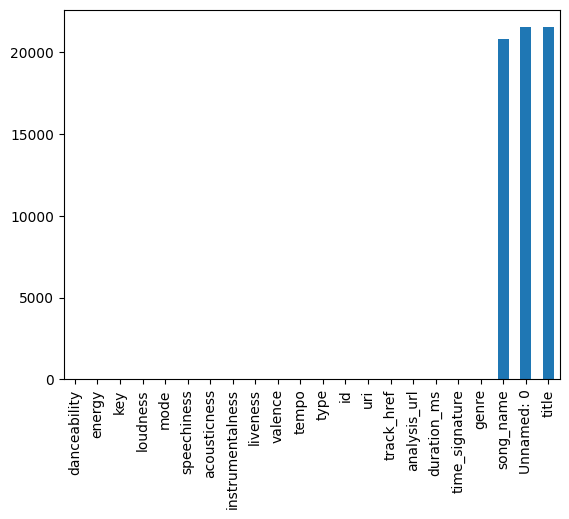

In [ ]:
tracks.isnull().sum().plot.bar()
plt.show()

In [ ]:
tracks=tracks.drop(['id','Unnamed: 0','title'],axis=1)

In [ ]:
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom


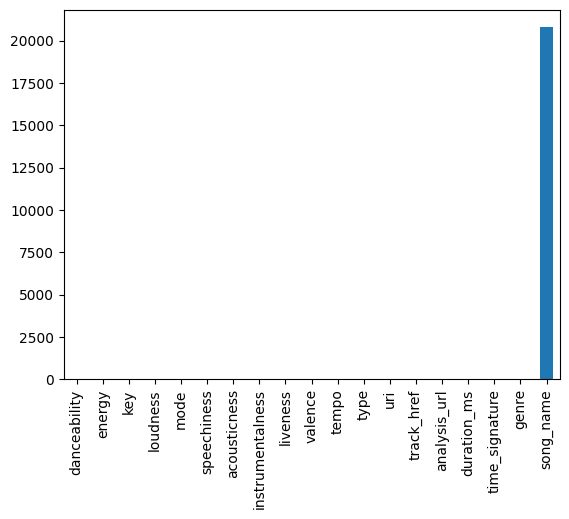

In [ ]:
tracks.isnull().sum().plot.bar()
plt.show()

In [ ]:
tracks.dropna(inplace=True)
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom


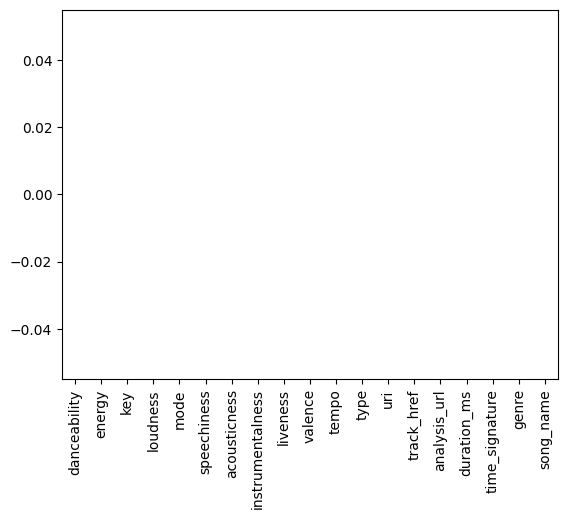

In [ ]:
tracks.isnull().sum().plot.bar()
plt.show()

In [ ]:
tracks=tracks.drop(['uri','analysis_url'],axis=1)
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,track_href,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,123298,4,Dark Trap,Venom


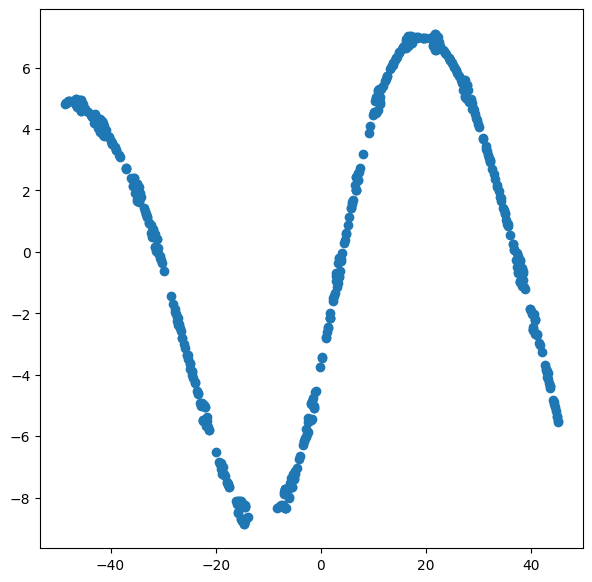

In [ ]:
numeric_columns = tracks.select_dtypes(include=['float64', 'int64']).columns
tracks_numeric = tracks[numeric_columns]
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(tracks_numeric.head(500))
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

In [ ]:
tracks['song_name'].nunique(),tracks.shape

(15439, (21519, 17))

In [ ]:
tracks = tracks.sort_values(by=['duration_ms'], ascending=False)
tracks.drop_duplicates(subset=['song_name'], keep='first', inplace=True)

In [ ]:
tracks.shape

(15439, 17)

IndexError: index 10 is out of bounds for axis 0 with size 10

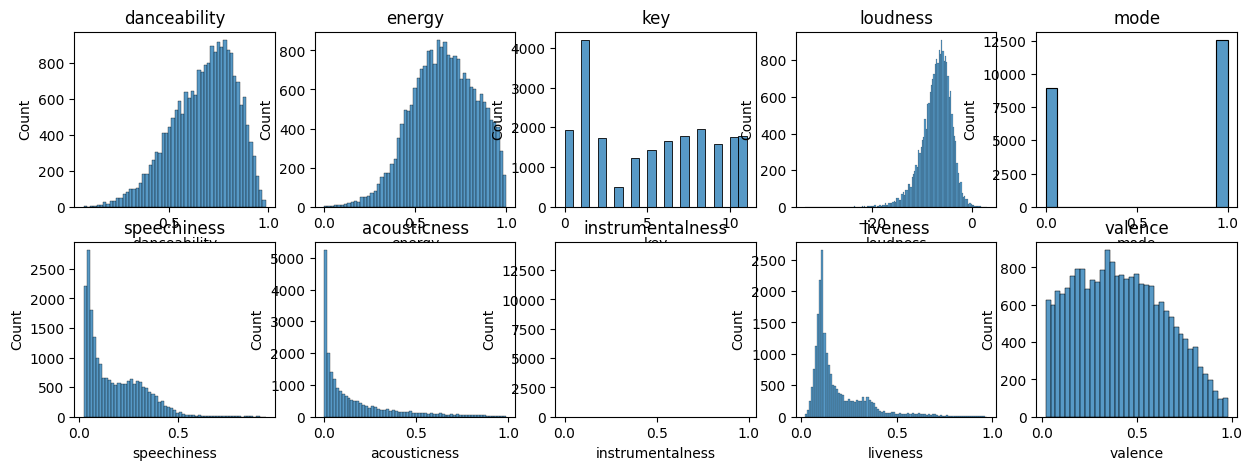

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=5,figsize = (15, 5))
axes=axes.flatten()
for i, col in enumerate(tracks_numeric.columns):
  sb.histplot(tracks_numeric[col],ax=axes[i])
  axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['genre'])

In [ ]:
def get_similarities(song_name, data):

  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['song_name']==song_name]['genre']).toarray()
  num_array1 = data[data['song_name']==song_name].select_dtypes(include=np.number).to_numpy()

  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['song_name']

    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['song_name']==name]['genre']).toarray()
    num_array2 = data[data['song_name']==name].select_dtypes(include=np.number).to_numpy()

    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)

  return sim

In [ ]:
def recommend_songs(song_name, data=tracks):
  # Base case
  if tracks[tracks['song_name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')

    for song in data.sample(n=5)['song_name'].values:
      print(song)
    return

  data['similarity_factor'] = get_similarities(song_name, data)

  data.sort_values(by=['similarity_factor', 'duration_ms'],
                   ascending = [False, False],
                   inplace=True)

  # First song will be the input song itself as the similarity will be highest.
  display(data[['song_name', 'track_href']][2:7])

In [ ]:
recommend_songs('	Pathology')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

Viva La Vida
SPMO!
No Way out (feat. GoldLink)
Real Soon
Goddamn (feat. A Boogie wit da Hoodie)


In [ ]:
recommend_songs('Murder on my Mind')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

Sun Come Up - Main
KOODA
Different Cloth
Keep It Real
I Spy


In [ ]:
recommend_songs("shape of you")

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

I'd Hate To Be You When People Find Out What This Song Is About
burden boy
STAINS
TOKYO RAIN
Change Ya Life


In [ ]:
recommend_songs("Me Love")

,song_name,track_href
17173,Back Home (feat. Summer Walker),https://api.spotify.com/v1/tracks/5mEVSbyxT38i...
17343,Paramedic!,https://api.spotify.com/v1/tracks/2tPcTFiQF9Mb...
16176,Get That Paper,https://api.spotify.com/v1/tracks/2XrxehNuYNrU...
15994,Uh Huh,https://api.spotify.com/v1/tracks/4bJ02dcoGEkc...
17545,Gold Digger,https://api.spotify.com/v1/tracks/0Gsj2iZerDbX...


In [ ]:
recommend_songs("Love Don't Cost a Thing")

KeyboardInterrupt: 

In [ ]:
recommend_songs('Potato Salad')

In [ ]:
recommend_songs('VIVID')

In [ ]:
recommend_songs('Polaroid')

In [ ]:
recommend_songs('SLOW DANCING IN THE DARK')

In [ ]:
recommend_songs('Life Goes On')

In [ ]:
recommend_songs('Yoshi City')

In [ ]:
recommend_songs('Trap by My Lonely')

In [ ]:
recommend_songs('They Said the Sky Was the Limit')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
test_data = {
    "Me Love": ["Back Home (feat. Summer Walker)", "Get That Paper"],
    "Love Don't Cost a Thing": ["Just A Little", "How It Was Supposed To Be	"],
    "Potato Salad":["In the Flesh","Make Room"],
    "Polaroid":["That's That Shit","This Is Why I'm Hot"],
    "VIVID":["First Person","All I Need (feat. Gift of Gab)"],
    "SLOW DANCING IN THE DARK":["Up All Night","Sexy Can I feat. Yung Berg"],
    "Life Goes On":["Run Tha Streetz","These Words Are Everything"],
    "Yoshi City":["Trade-Off","INDIE MUSIC GIRL"],
    "Trap by My Lonely":["Grab Tha Gauge","Money Trees"],
    "They Said the Sky Was the Limit":["Laps","Mean Girls"]
}
pairs = []
labels = []

for song, relevant_songs in test_data.items():
    for relevant_song in relevant_songs:
        pairs.append((song, relevant_song, 1))  # Relevant pair
    non_relevant_songs = tracks[~tracks['song_name'].isin(relevant_songs + [song])]['song_name'].sample(len(relevant_songs)).values
    for non_relevant_song in non_relevant_songs:
        pairs.append((song, non_relevant_song, 0))  # Non-relevant pair

# Create DataFrame
df_pairs = pd.DataFrame(pairs, columns=['song_1', 'song_2', 'relevance'])

# Merge features
df_pairs = df_pairs.merge(tracks, left_on='song_1', right_on='song_name').drop(columns=['song_name', 'track_href'])
df_pairs = df_pairs.merge(tracks, left_on='song_2', right_on='song_name', suffixes=('_1', '_2')).drop(columns=['song_name', 'track_href'])

# Features and labels
X = df_pairs.drop(columns=['song_1', 'song_2', 'relevance'])
y = df_pairs['relevance']

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle any remaining non-numeric data or missing values
X = X.fillna(0)  # Simple strategy to fill missing values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Calculate accuracy, precision, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.5
Precision: 0.3333333333333333
Confusion Matrix:
[[2 4]
 [0 2]]


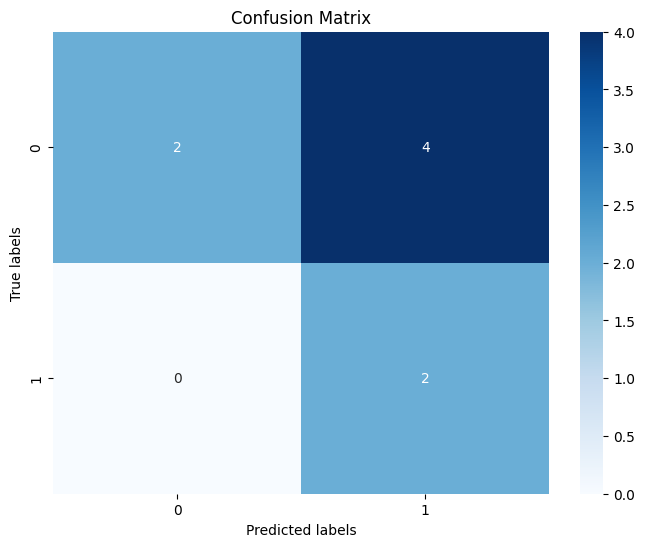

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()